In [105]:
#Importing Libraries
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
#Loading & reading the data. Only first columns will be considered for this project 

ama_ratings_df = pd.read_csv('ratings_Electronics.csv', names = col_names, usecols =['userId','productId','ratings'])
col_names = ['userId','productId','ratings','timestamp']

In [107]:
ama_ratings_df.describe() #Reviewing the generic functions for the dataset

,ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [108]:
ama_ratings_df.head() #First 5 rows of the dataset

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [109]:
ama_ratings_df.shape

(7824482, 3)

In [110]:
ama_ratings_df.isnull().sum() #No Null Values

userId       0
productId    0
ratings      0
dtype: int64

In [111]:
# Keep only the users who have rated the products 50 or more times

count = ama_ratings_df['userId'].value_counts()
final_Rating = ama_ratings_df[ama_ratings_df['userId'].isin(count[count >49].index)]
final_Rating.shape

(125871, 3)

In [112]:
final_Rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 94 to 7824444
Data columns (total 3 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


In [113]:
final_Rating.head() 
#We can clearly see the decrease of rows in the dataset and head also gives a different output when compared to previous output

,userId,productId,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [114]:
final_Rating.describe()

,ratings
count,125871.000000
mean,4.261339
std,1.062144
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


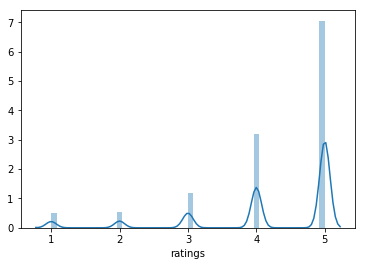

In [115]:
sns.distplot(final_Rating['ratings'])

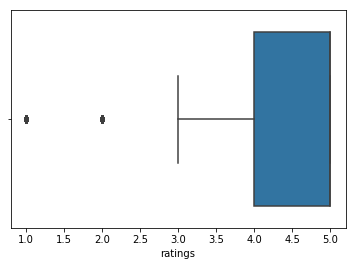

In [116]:
sns.boxplot(final_Rating['ratings'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD9530EB38>]],
      dtype=object)

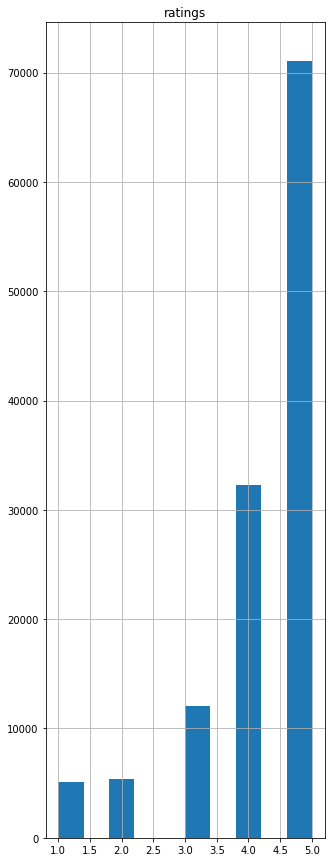

In [117]:
final_Rating.hist(figsize=(5,15))

From the above visualization, we can infer the data is skewed.
In order to find out if the data is normally distributed we can make use of Shapiro test. In order to this lets define the NUll & alternate hypothesis

H0:Sample is drawn from normally distributed dataset
Ha : Sample is drawn from dataset which is not normally distributed

In [118]:
from scipy.stats import shapiro
t_stats, p_value = shapiro(final_Rating[final_Rating.ratings == 5]['ratings'])
print('rating scale-5: t-statistic: %.2f, p-value:%.2f'%(t_stats, p_value))


rating scale-5: t-statistic: 1.00, p-value:1.00


C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [119]:
t_stats, p_value = shapiro(final_Rating[final_Rating.ratings == 4]['ratings'])
print('rating scale-4: t-statistic: %.2f, p-value:%.2f'%(t_stats, p_value))

t_stats, p_value = shapiro(final_Rating[final_Rating.ratings == 3]['ratings'])
print('rating scale-3: t-statistic: %.2f, p-value:%.2f'%(t_stats, p_value))

t_stats, p_value = shapiro(final_Rating[final_Rating.ratings == 2]['ratings'])
print('rating scale-2: t-statistic: %.2f, p-value:%.2f'%(t_stats, p_value))

t_stats, p_value = shapiro(final_Rating[final_Rating.ratings == 1]['ratings'])
print('rating scale-1: t-statistic: %.2f, p-value:%.2f'%(t_stats, p_value))

rating scale-4: t-statistic: 1.00, p-value:1.00
rating scale-3: t-statistic: 1.00, p-value:1.00
rating scale-2: t-statistic: 1.00, p-value:1.00
rating scale-1: t-statistic: 1.00, p-value:1.00


C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\sit

In [120]:
 #Splitting of the dataset into train & test

from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

#70:30 ratio

reader = Reader(rating_scale=(1,5))
surprise_dataset = Dataset.load_from_df(final_Rating, reader)
trainset, testset = train_test_split(surprise_dataset, test_size=0.3, random_state=1)
type(trainset), type(testset)

(surprise.trainset.Trainset, list)

Popularity recommender model
This basically uses the items which are currently trending


In [121]:
rating_final_grouped = final_Rating.groupby('productId').agg({'ratings':'count'}).reset_index()
rating_final_grouped.head()

,productId,ratings
0,0594451647,1
1,0594481813,1
2,0970407998,2
3,0972683275,4
4,1400501466,6


In [122]:
# Renaming ratings column as score

rating_final_grouped.rename(columns = {'ratings': 'score'},inplace=True)

In [123]:
# Sorting in decending order to get top 5 popular products

ratings_final_sorted = rating_final_grouped.sort_values(by='score',ascending=False)
ratings_final_sorted.head(10) # Top 10 products

,productId,score
39003,B0088CJT4U,206
24827,B003ES5ZUU,184
11078,B000N99BBC,167
38250,B007WTAJTO,164
38615,B00829TIEK,149
39338,B008DWCRQW,137
38611,B00829THK0,137
21982,B002R5AM7C,128
28761,B004CLYEDC,118
22210,B002SZEOLG,113


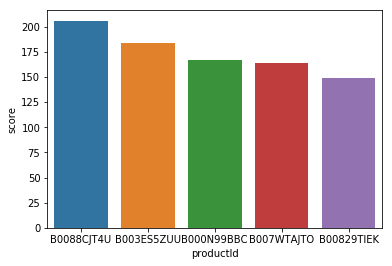

In [124]:
sns.barplot(ratings_final_sorted['productId'].head(5),ratings_final_sorted['score'].head(5))

Collaborative recommender model

Collaborative Filtering need users historical preference on a set of items. Because it’s based on historical data, the assumption here is that the users who have agreed in the past tend to also agree in the future.

As we have already subset our dataset to 50 or more number of ratings, we will be using item-based collaborative filtering method. we'll be using SVD approach i.e. matrix factorisation method.

In [125]:
# Importing from surprise package

from surprise import KNNBasic, KNNWithMeans, SVD
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import accuracy
from surprise import SVD

In [126]:
param_grid = {'n_factors': [10, 20, 30],
              'reg_all': [0.01, 0.02, 0.03]}

grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, refit=True)
grid_search.fit(surprise_dataset)

In [127]:
# get all parameter combinations

grid_search.param_combinations

[{'n_factors': 10, 'reg_all': 0.01},
 {'n_factors': 10, 'reg_all': 0.02},
 {'n_factors': 10, 'reg_all': 0.03},
 {'n_factors': 20, 'reg_all': 0.01},
 {'n_factors': 20, 'reg_all': 0.02},
 {'n_factors': 20, 'reg_all': 0.03},
 {'n_factors': 30, 'reg_all': 0.01},
 {'n_factors': 30, 'reg_all': 0.02},
 {'n_factors': 30, 'reg_all': 0.03}]

In [128]:
# getting best score and parameters to perform svd

print(grid_search.best_score['rmse'])
print(grid_search.best_params['rmse'])

0.9807055265848202
{'n_factors': 10, 'reg_all': 0.02}


In [129]:
# Creating object of svd 

svd = SVD(n_factors=10, reg_all=0.03, random_state=1)

In [130]:
# Fitting trainset to svd

svd.fit(trainset)

In [131]:
# Prediction on first row of testset

svd.predict(uid=testset[0][0], iid=testset[0][1])

Prediction(uid='A3PDWA32BAMB2Y', iid='B00CGW74YU', r_ui=None, est=4.30923486026865, details={'was_impossible': False})

In [132]:
# Testing the algorithm on testset

test_pred = svd.test(testset)

In [133]:
# Keeping actual ratings along with predicted ratings which will help us to calculate precision recall

actual_ratings = [x[2] for x in testset]
len(test_pred), len(actual_ratings)

(37762, 37762)

In [134]:
# Combing the testset with actual rating

test_pred_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in test_pred], columns=['userid','productId','rating'])
test_pred_df['actual'] = list(actual_ratings)

In [135]:
test_pred_df.head()


,userid,productId,rating,actual
0,A3PDWA32BAMB2Y,B00CGW74YU,4.309235,5.0
1,A31BD4RXCON7QO,B000P6G7YW,4.256987,1.0
2,A3J8A5L5AF5TX9,B001GS8G06,4.015295,1.0
3,A3D6OI36USYOU1,B000A1790S,4.254132,5.0
4,A3JU16JTNLVK1J,B002CX16WO,3.986750,2.0


In [136]:

test_pred_df.sort_values(by=['rating','userid','productId'], ascending=[0, 1, 1], inplace=True)
test_pred_df = test_pred_df.groupby('userid').head(5).reset_index(drop=True)
test_pred_df.head()


,userid,productId,rating,actual
0,A10O7THJ2O20AG,B00080G0BK,5.0,5.0
1,A10O7THJ2O20AG,B000IF51UQ,5.0,5.0
2,A10O7THJ2O20AG,B0015EDVVU,5.0,5.0
3,A10O7THJ2O20AG,B007PJ4P4G,5.0,5.0
4,A10O7THJ2O20AG,B007WTAJTO,5.0,5.0


In [150]:
class PrecisionRecallEvaluator():
    
    def __init__(self):
        self.precisions = dict()
        self.recalls = dict()
        
    def precision_recall(self, predictions, threshold=3.5):
        
        #getting unique userIds so than we can calculate precision recall for each userId
        userIds = predictions['userid'].unique()
        
        for userId in userIds:
            user_ratings = predictions[predictions['userid'] == userId]
            
            # Number of relevant items
            n_rel = len(user_ratings[user_ratings['actual'] >= threshold])

            # Number of recommended items in top k
            n_rec_k = len(user_ratings[user_ratings['rating'] >= threshold])

            # Number of relevant and recommended items in top k
            n_rel_and_rec_k = len(user_ratings[(user_ratings['actual'] >= threshold) & 
                                               (user_ratings['rating'] >= threshold)])

            # Precision: Proportion of recommended items that are relevant
            self.precisions[userId] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

            # Recall: Proportion of relevant items that are recommended
            self.recalls[userId] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

        return self.precisions, self.recalls

In [138]:
accuracy.rmse(test_pred)

RMSE: 0.9798


0.9798157403872609

In [139]:
# Function called to calculate precision & recall.

pr_calculator = PrecisionRecallEvaluator()
precisions, recalls = pr_calculator.precision_recall(test_pred_df, threshold=3.5)
# Precision and recall can then be averaged over all users

print('Precision: ', sum(prec for prec in precisions.values()) / len(precisions))
print('Recall:', sum(rec for rec in recalls.values()) / len(recalls))

Precision:  0.8983982683982583
Recall: 0.9756926406926408


Get top - K ( K = 5) recommendations


In [140]:
class PersonalizedRecommender():
    def __init__(self):
        self.matrix = None
        self.userId = None
    def fit(self, pr_dataset):
        self.matrix = pr_dataset
    def recommend(self, userId):
        return self.matrix[self.matrix.userid == userId].reset_index(drop=True)

In [141]:
pr = PersonalizedRecommender()
pr.fit(test_pred_df)

In [152]:
pr.recommend(userIds[10])

NameError: name 'userIds' is not defined

In [153]:
sorted_ratings = final_Rating.groupby('ratings').agg({'productId':'count'})
sorted_ratings = sorted_ratings.sort_values(by=['ratings'], ascending=False)
sorted_ratings.rename(columns = {'productId': 'count'},inplace=True)
sorted_ratings

,count
ratings,
5.0,71034
4.0,32295
3.0,12060
2.0,5367
1.0,5115


In [154]:
final_Rating.groupby(['userId']).agg({'productId':'count'}).sort_values(by='productId', ascending=False).head()

,productId
userId,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406
